In [2]:
import torch
precision = 'fp32' 
model = torch.hub.load('NVIDIA/DeepLearningExamples:torchhub', 'nvidia_ssd', model_math=precision).cuda()

Using cache found in /home/vic/.cache/torch/hub/NVIDIA_DeepLearningExamples_torchhub


In [12]:
utils = torch.hub.load('NVIDIA/DeepLearningExamples:torchhub', 'nvidia_ssd_processing_utils')

Using cache found in /home/vic/.cache/torch/hub/NVIDIA_DeepLearningExamples_torchhub


In [13]:
model.to('cuda')
model.eval()
%clear

In [14]:
uris = ['o0OtcERZCO0u5VffZ3jM6fkPXRSOW2Ilb36MsCZauI6hugOtUOOQc2aMwuB0dhctV9R9nxCUcBZdjtgLE15Ni3sFi82X76p7.jpg',
       '00s.jpg',
       '1502173753105.jpg',
       '6930f060ebd3de17433c4ccb598f1825566af609712c2673927188.jpg',
       'photo.jpg']

In [15]:
inputs = [utils.prepare_input(uri) for uri in uris]
tensor = utils.prepare_tensor(inputs)

In [16]:
with torch.no_grad():
    detections_batch = model(tensor)

In [17]:
results_per_input = utils.decode_results(detections_batch)
best_results_per_input = [utils.pick_best(results, 0.3) for results in results_per_input]

In [18]:
classes_to_labels = utils.get_coco_object_dictionary()

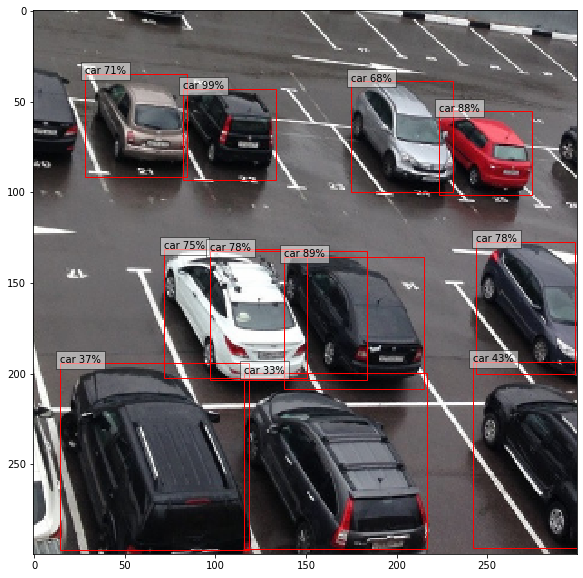

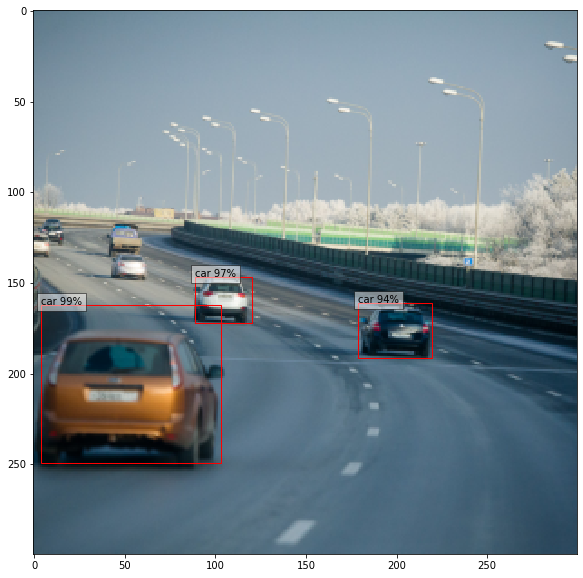

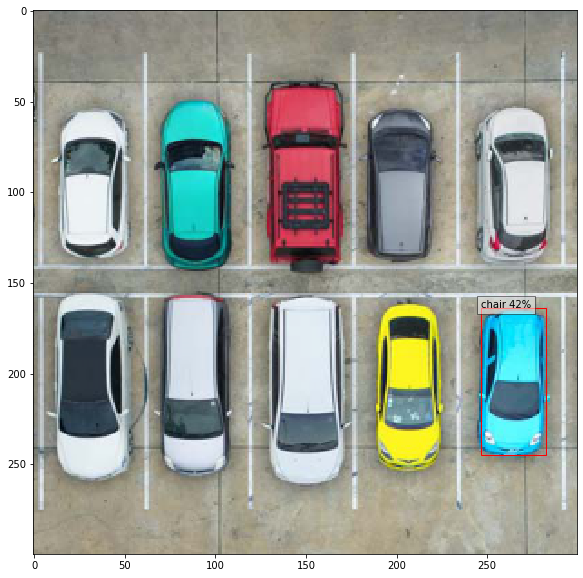

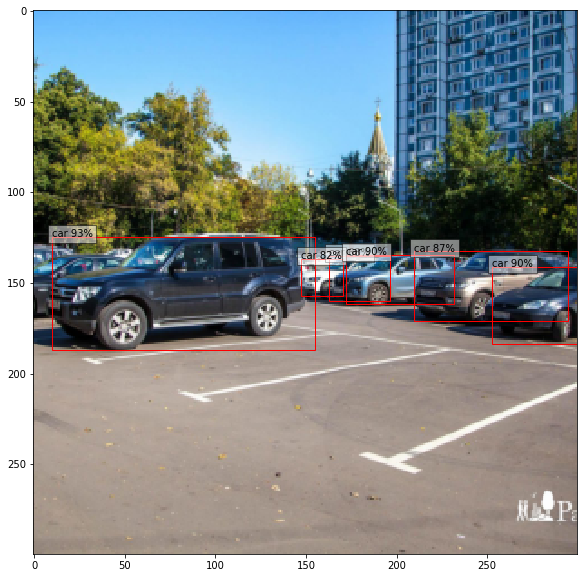

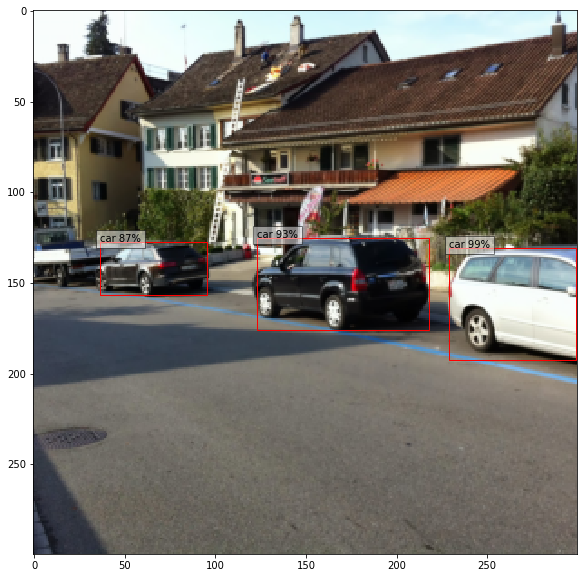

In [19]:
from matplotlib import pyplot as plt
import matplotlib.patches as patches
# from matplotlib.pyplot import figure
# figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

for image_idx in range(len(best_results_per_input)):
#     fig = plt.figure(figsize = (20,10))
    fig, ax = plt.subplots(1)
    fig.set_size_inches(20, 10, forward=True)
    
    # Show original, denormalized image...
    image = inputs[image_idx] / 2 + 0.5
    ax.imshow(image)
    # ...with detections
    bboxes, classes, confidences = best_results_per_input[image_idx]
    for idx in range(len(bboxes)):
        left, bot, right, top = bboxes[idx]
        x, y, w, h = [val * 300 for val in [left, bot, right - left, top - bot]]
        rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        ax.text(x, y, "{} {:.0f}%".format(classes_to_labels[classes[idx] - 1], confidences[idx]*100), bbox=dict(facecolor='white', alpha=0.5))
plt.show()